In [2]:
# import requests as req
# import pandas as pd
# from nsepy import get_history
from datetime import date
import formulas2

In [6]:
apv_api_key = '2N8UEPVRC2AWTK6B'
apv_base_url = 'https://www.alphavantage.co'
size = 'compact'
ticker = 'NSE:TCS'

time_series_daily = req.get(apv_base_url + '/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=' + ticker + '&outputsize=' + size + '&apikey=' + apv_api_key)


dataframe = pd.DataFrame(time_series_daily)

# print(time_series_daily)

<AxesSubplot:xlabel='Date'>

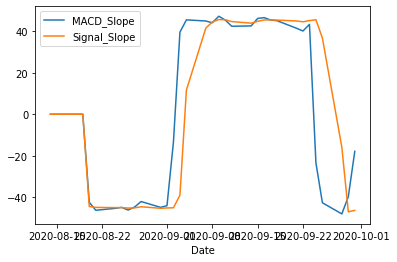

In [8]:
ticker = formulas2.Ticker("TCS", date(2020,6,30), date(2020,9,30))

data = ticker.get_historical_data()
data_copy = data.copy()

indicator = formulas2.Indicator(data)

macd_data = indicator.MACD()
macd_slope = indicator.slope(macd_data["MACD"])
signal_slope = indicator.slope(macd_data["Signal"])



final_data = macd_data.copy()

# print(final_data)

final_data["MACD_Slope"] = macd_slope
final_data["Signal_Slope"] = signal_slope

final_data[["MACD_Slope", "Signal_Slope"]].plot()

# macd_data[['MACD', 'Signal']].plot()

# data[['Close']].plot()

In [12]:
cash = 1000

test_data = final_data.copy()

for i in range(len(test_data)):
    if (test_data['MACD'][i] > test_data['Signal'][i] and test_data['MACD_Slope'][i] > test_data['Signal_Slope'][i]):
        # BUY
        if (cash >= test_data['Close'][i]):
            cash = cash - test_data['Close'][i]
            test_data["Status"][i] = 'BUY'

    print(final_data['MACD'][i])

10.746034521549518
9.337716147285391
9.358110935593231
8.273176480796337
7.044722196298608
5.678869475267675
4.506421265100471
3.119261759055462
2.8315380501667278
2.180713217608627
0.8849646124153878
1.3087111461077257
0.7793939229222815
1.818360382294486
5.288255751650468
7.110027057191473
11.446525860673773
16.36849329275674
18.425131463707203
20.100368859786613
24.559336038411402
37.00279528897772
46.32758219558673
54.01780463867226
56.106796888163444
56.23007877754344
56.902128578564316
61.339040870118424
59.72244846253989
47.06801278457215
43.752547130063704
40.973174637629654
43.25360635809329
44.85624038111928
